In [1]:
from pathlib import Path

project_root_path = Path.cwd().parent
project_root_path

WindowsPath('F:/projects_ssd/tfm/tfm-rl-starcraft2')

In [2]:
models_path = project_root_path / "models"
# models_path = project_root_path / "models_or"
models_path

WindowsPath('F:/projects_ssd/tfm/tfm-rl-starcraft2/models')

In [27]:
import pandas as pd
import numpy as np

def assign_phase(row):
    if row["is_exploit"]:
        return "Exploit"
    if row["is_training"]:
        return "Training"
    return "Burn-in"


def get_agent_stats(model_id: str):
    model_path = models_path / model_id
    agent_stats_path = model_path / "agent_stats.parquet"
    
    return pd.read_parquet(agent_stats_path)

def get_aggregated_stats(model_id: str):
    model_path = models_path / model_id
    aggregated_stats_path = model_path / "aggregated_stats.parquet"

    return pd.read_parquet(aggregated_stats_path)

def get_episode_stats(model_id: str):
    model_path = models_path / model_id
    episode_stats_path = model_path / "episode_stats.parquet"

    episode_stats = pd.read_parquet(episode_stats_path)
    episode_stats['episode'] = np.arange(len(episode_stats))

    episode_stats["stage"] = episode_stats.apply(assign_phase, axis=1)


    episode_stats["loss"] = episode_stats["losses"].apply(lambda losses: np.mean(losses))
    
    return episode_stats

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12, 6)})

def plot_rewards(episode_stats, title_prefix: str):
    return sns.lineplot(data=episode_stats, x="episode", y="reward", hue="stage").set_title(f"{title_prefix} - Reward over time")

def plot_losses(episode_stats, title_prefix: str):
    return sns.lineplot(data=episode_stats, x="episode", y="loss", hue="stage").set_title(f"{title_prefix} - Loss over time")

def plot_epsilon(episode_stats, title_prefix: str):
    return sns.lineplot(data=episode_stats, x="episode", y="epsilon", hue="stage").set_title(f"{title_prefix} - Epsilon over time")

In [14]:




sns.lineplot(data=episode_stats, x="episode", y="loss", hue="stage").set_title("Loss over time") ;

In [53]:
base_model_id = "single_drl"
collect_minerals_model_id = f"{base_model_id}_collect_minerals"
build_marines_model_id = f"{base_model_id}_build_marines"
defeat_roaches_model_id = f"{base_model_id}_defeat_roaches"
defeat_zerglings_model_id = f"{base_model_id}_defeat_zerglings_and_banelings"
simple64_model_id = f"{base_model_id}_simple64"

In [48]:
def load_stats(model_id, model_name: str, show_plots: bool = True):
    agent_stats = get_agent_stats(model_id)
    aggregated_stats = get_aggregated_stats(model_id)
    episode_stats = get_episode_stats(model_id)
    total_episodes = len(episode_stats)
    total_training_episodes = len(episode_stats[episode_stats["is_training"] == True])
    total_exploit_episodes = len(episode_stats[episode_stats["is_exploit"] == True])
    total_burnin_episodes = total_episodes - total_training_episodes - total_exploit_episodes
    total_random_mode_episodes = len(episode_stats[episode_stats["is_random_mode"] == True])
    print(f"Total episodes: {total_episodes}")
    print(f"Total burnin episodes: {total_burnin_episodes}")
    print(f"Total random mode episodes: {total_random_mode_episodes}")
    print(f"Total episodes: {total_training_episodes}")
    print(f"Total exploit episodes: {total_exploit_episodes}")
    print("Unique maps in episode stats: ", episode_stats["map_name"].unique())

    if show_plots:
        plot_stats(episode_stats, model_name)
    
    return episode_stats, agent_stats, aggregated_stats
    

In [47]:
def plot_stats(episode_stats, model_name):
    plot_rewards(episode_stats, model_name) ;
    plt.show()
    plot_losses(episode_stats, model_name) ;
    plt.show()
    plot_epsilon(episode_stats, model_name) ;
    plt.show()

# Collect minerals - standalone

Total episodes: 300
Total burnin episodes: 71
Total random mode episodes: 0
Total episodes: 229
Total exploit episodes: 0
Unique maps in episode stats:  ['CollectMineralsAndGas']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


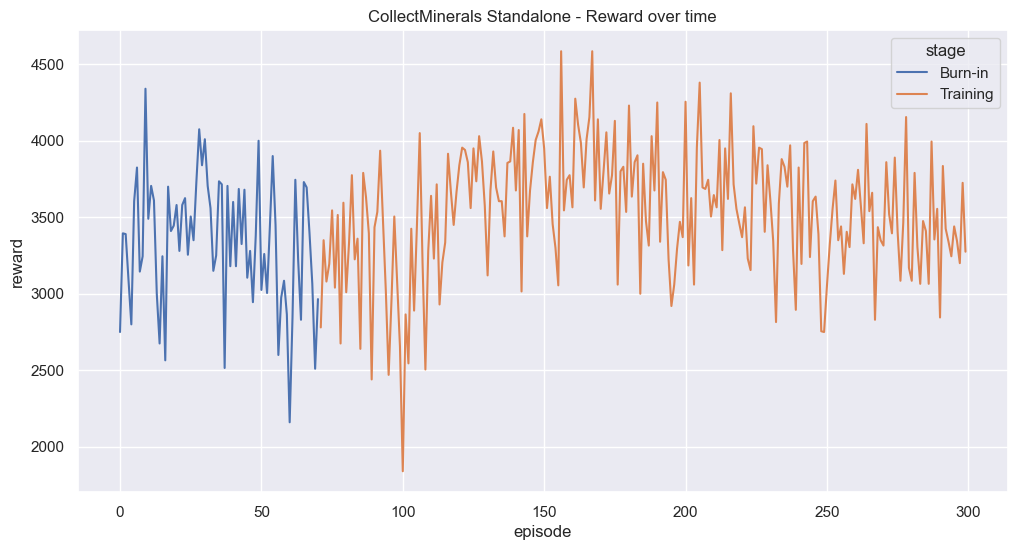

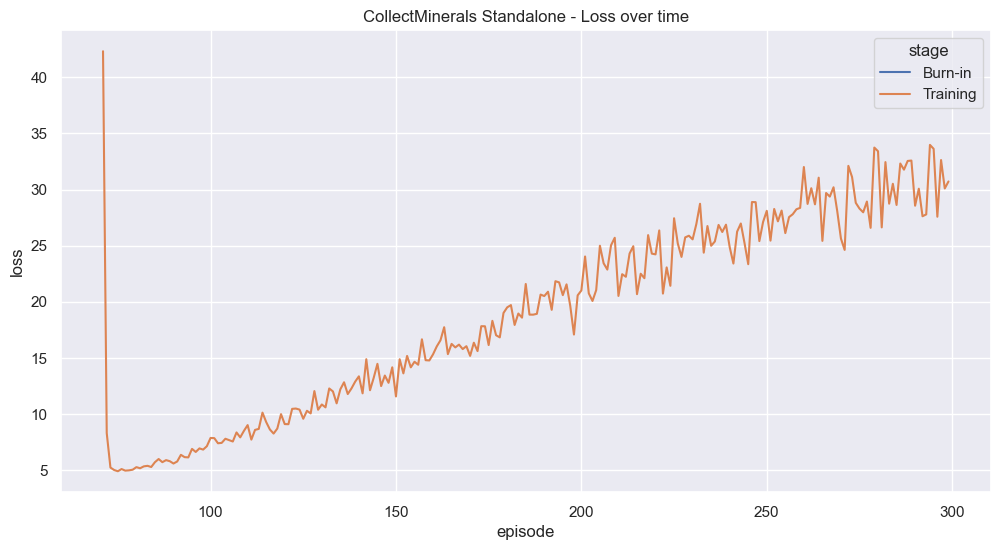

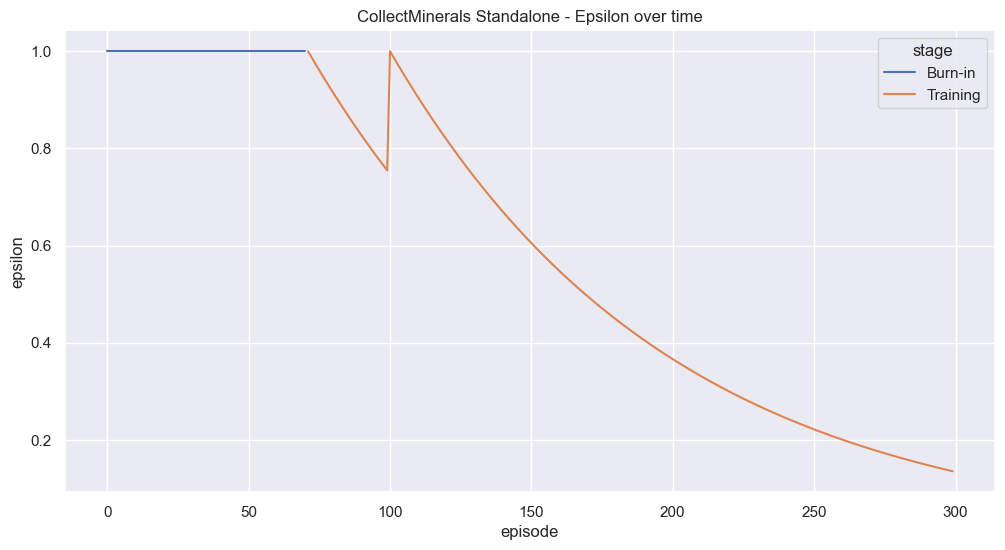

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,CollectMineralsAndGas,2750.0,141,1.0,[],0.000221,0,False,False,False,0,Burn-in,NaN
1,CollectMineralsAndGas,3395.0,141,1.0,[],0.000463,0,False,False,False,1,Burn-in,NaN
2,CollectMineralsAndGas,3390.0,141,1.0,[],0.000711,0,False,False,False,2,Burn-in,NaN
3,CollectMineralsAndGas,3090.0,141,1.0,[],0.000957,0,False,False,False,3,Burn-in,NaN
4,CollectMineralsAndGas,2800.0,141,1.0,[],0.001202,0,False,False,False,4,Burn-in,NaN


In [49]:
episode_stats, agent_stats, aggregated_stats = load_stats(collect_minerals_model_id, model_name="CollectMinerals Standalone")
episode_stats.head()

In [38]:
agent_stats.head(10)

,map_name,step_count,episode_count,total_reward,total_score,total_emissions
0,CollectMineralsAndGas,42300,300,1045710.0,0,10.252701


In [39]:
aggregated_stats.head(10)

,map_name,rewards,scores,epsilons,losses,steps,emissions,max_reward,max_score
0,CollectMineralsAndGas,"[2750.0, 3395.0, 3390.0, 3090.0, 2800.0, 3605....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[inf, inf, inf, inf, inf, inf, inf, inf, inf, ...","[141, 141, 141, 141, 141, 141, 141, 141, 141, ...","[0.00022097196751884513, 0.0004629719376525588...",4585.0,0


# Build marines

Total episodes: 300
Total burnin episodes: 33
Total random mode episodes: 0
Total episodes: 267
Total exploit episodes: 0
Unique maps in episode stats:  ['BuildMarines']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


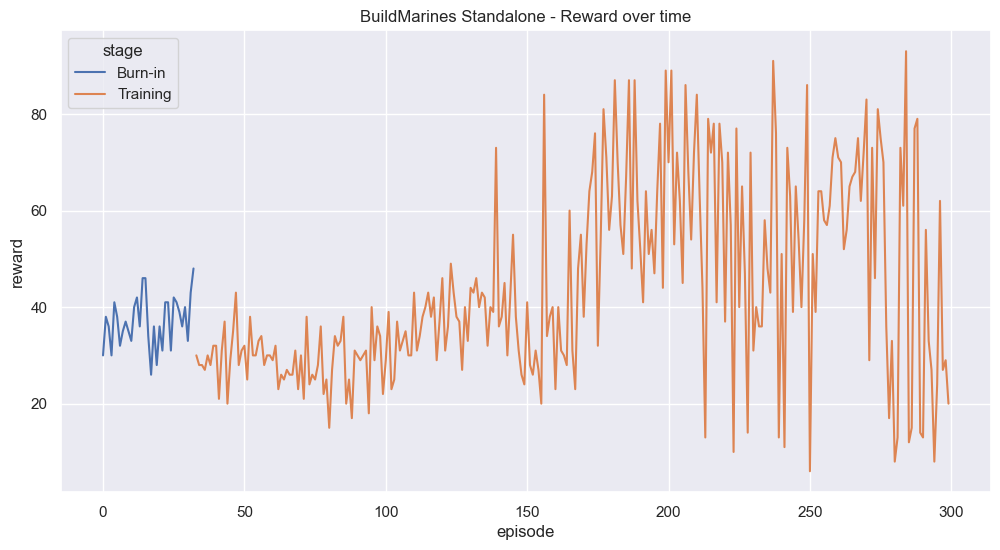

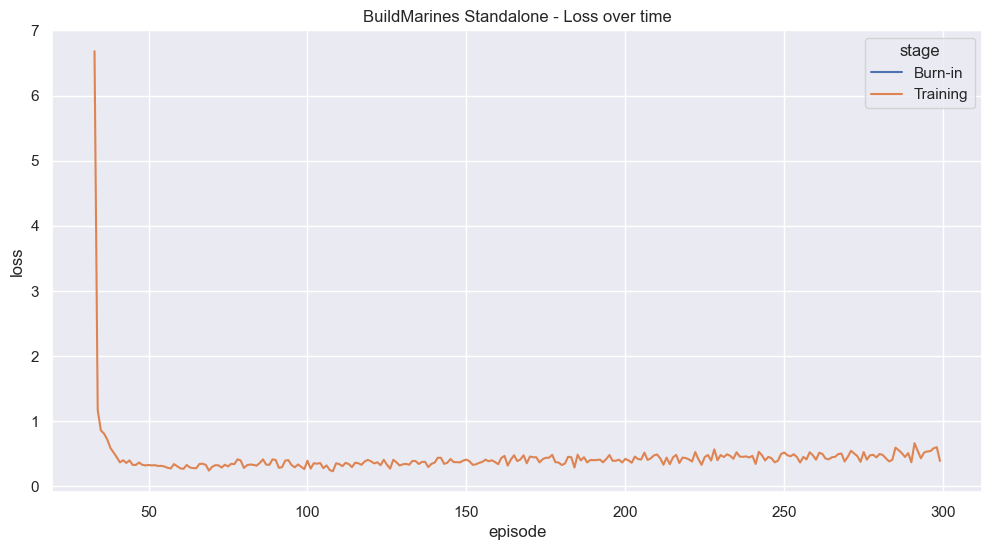

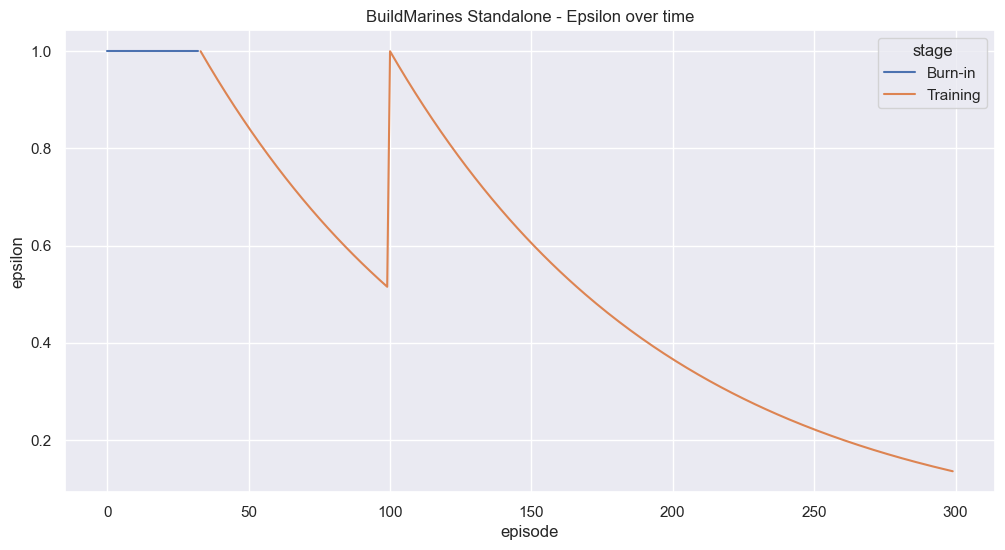

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,BuildMarines,30.0,301,1.0,[],0.000702,0,False,False,False,0,Burn-in,NaN
1,BuildMarines,38.0,301,1.0,[],0.001689,0,False,False,False,1,Burn-in,NaN
2,BuildMarines,36.0,301,1.0,[],0.002645,0,False,False,False,2,Burn-in,NaN
3,BuildMarines,30.0,301,1.0,[],0.003642,0,False,False,False,3,Burn-in,NaN
4,BuildMarines,41.0,301,1.0,[],0.004592,0,False,False,False,4,Burn-in,NaN


In [50]:
episode_stats, agent_stats, aggregated_stats = load_stats(build_marines_model_id, model_name="BuildMarines Standalone")
episode_stats.head()

# Defeat Roaches

Total episodes: 300
Total burnin episodes: 300
Total random mode episodes: 0
Total episodes: 0
Total exploit episodes: 0
Unique maps in episode stats:  ['DefeatRoaches']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


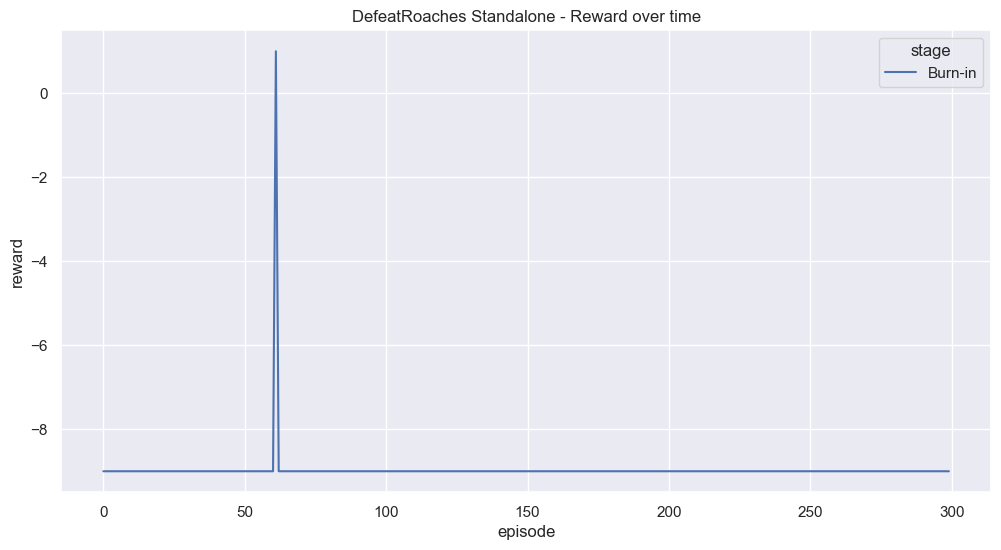

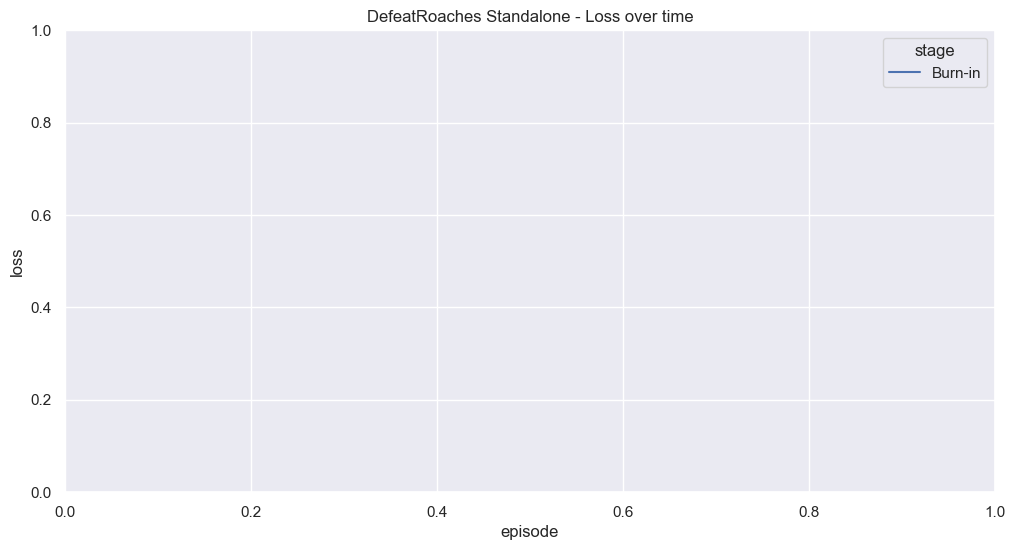

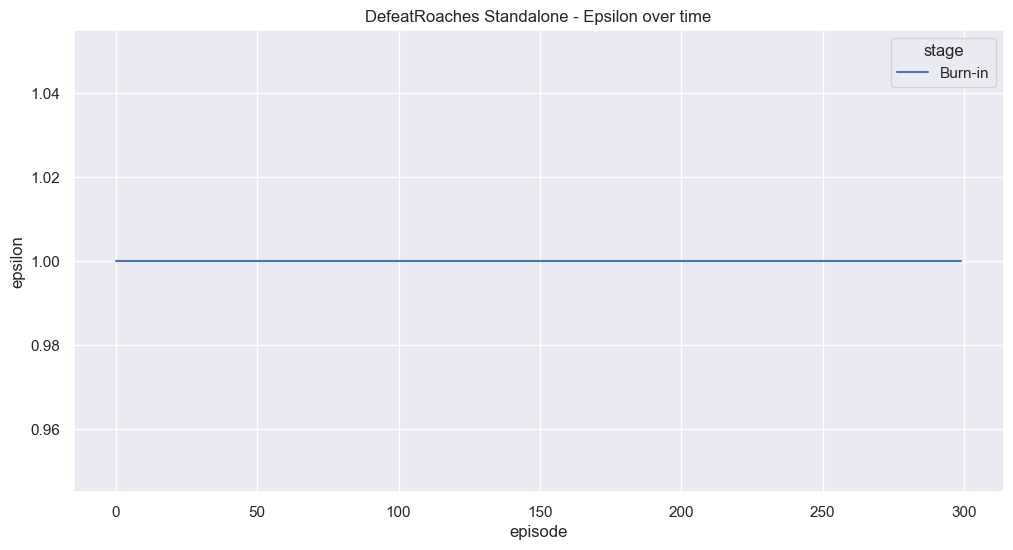

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,DefeatRoaches,-9.0,30,1.0,[],0.000082,0,False,False,False,0,Burn-in,NaN
1,DefeatRoaches,-9.0,19,1.0,[],0.000149,0,False,False,False,1,Burn-in,NaN
2,DefeatRoaches,-9.0,26,1.0,[],0.000220,0,False,False,False,2,Burn-in,NaN
3,DefeatRoaches,-9.0,20,1.0,[],0.000288,0,False,False,False,3,Burn-in,NaN
4,DefeatRoaches,-9.0,21,1.0,[],0.000355,0,False,False,False,4,Burn-in,NaN


In [51]:
episode_stats, agent_stats, aggregated_stats = load_stats(defeat_roaches_model_id, model_name="DefeatRoaches Standalone")
episode_stats.head()

# Defeat Zerglings

Total episodes: 300
Total burnin episodes: 300
Total random mode episodes: 0
Total episodes: 0
Total exploit episodes: 0
Unique maps in episode stats:  ['DefeatZerglingsAndBanelings']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


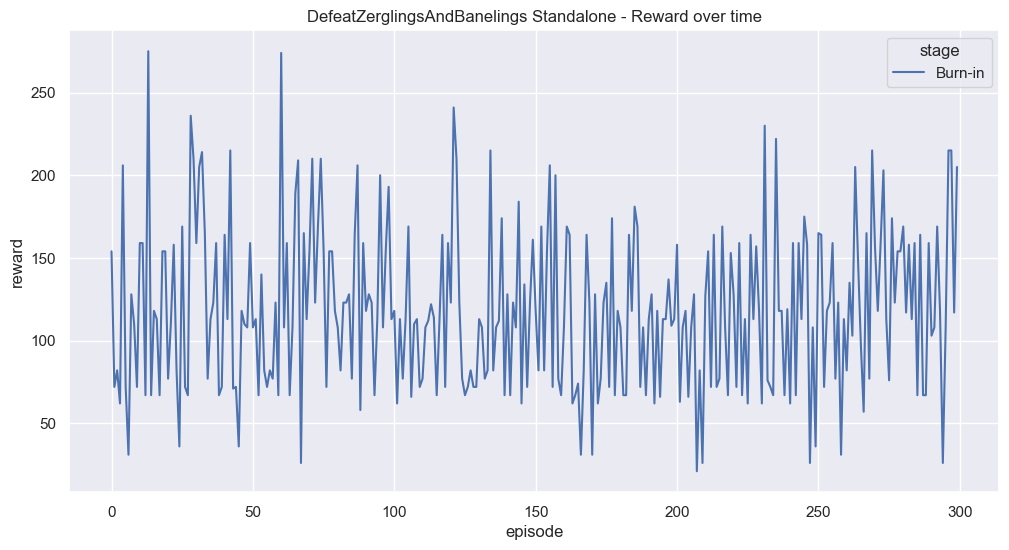

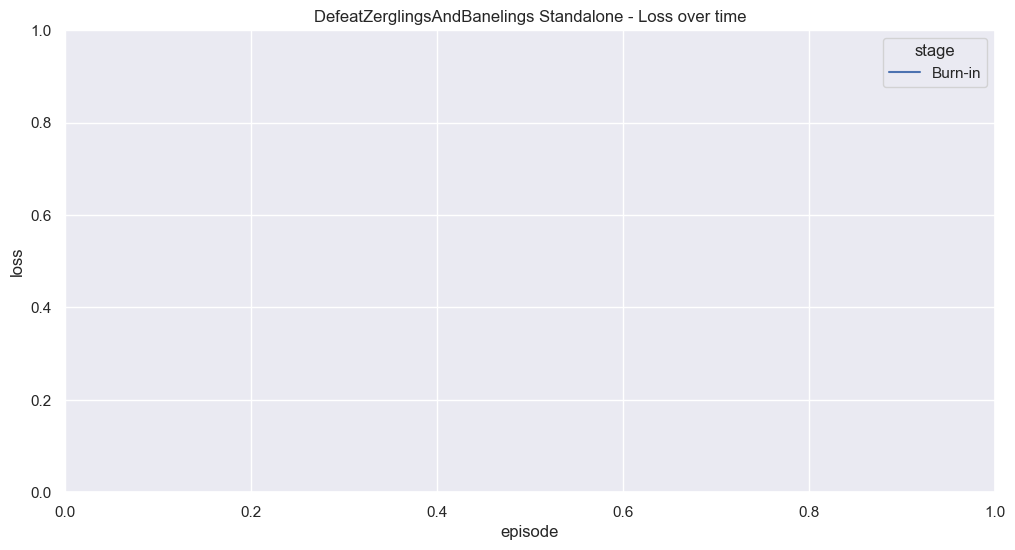

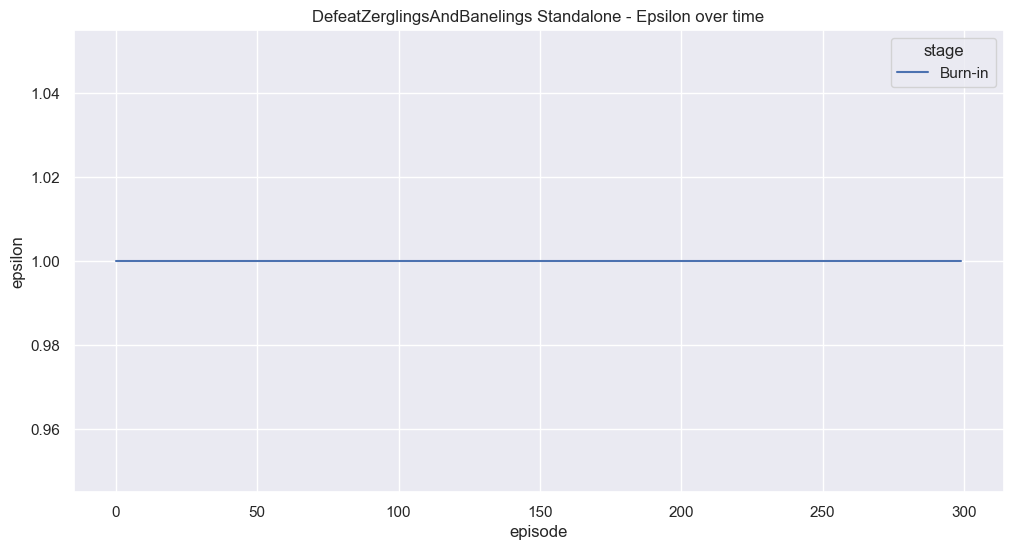

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,DefeatZerglingsAndBanelings,154.0,18,1.0,[],0.000080,0,False,False,False,0,Burn-in,NaN
1,DefeatZerglingsAndBanelings,72.0,27,1.0,[],0.000153,0,False,False,False,1,Burn-in,NaN
2,DefeatZerglingsAndBanelings,82.0,19,1.0,[],0.000222,0,False,False,False,2,Burn-in,NaN
3,DefeatZerglingsAndBanelings,62.0,16,1.0,[],0.000293,0,False,False,False,3,Burn-in,NaN
4,DefeatZerglingsAndBanelings,206.0,41,1.0,[],0.000735,0,False,False,False,4,Burn-in,NaN


In [54]:
episode_stats, agent_stats, aggregated_stats = load_stats(defeat_zerglings_model_id, model_name="DefeatZerglingsAndBanelings Standalone")
episode_stats.head()

# Simple64

Total episodes: 300
Total burnin episodes: 24
Total random mode episodes: 0
Total episodes: 276
Total exploit episodes: 0
Unique maps in episode stats:  ['Simple64']


D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\anaconda3\envs\tfm\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


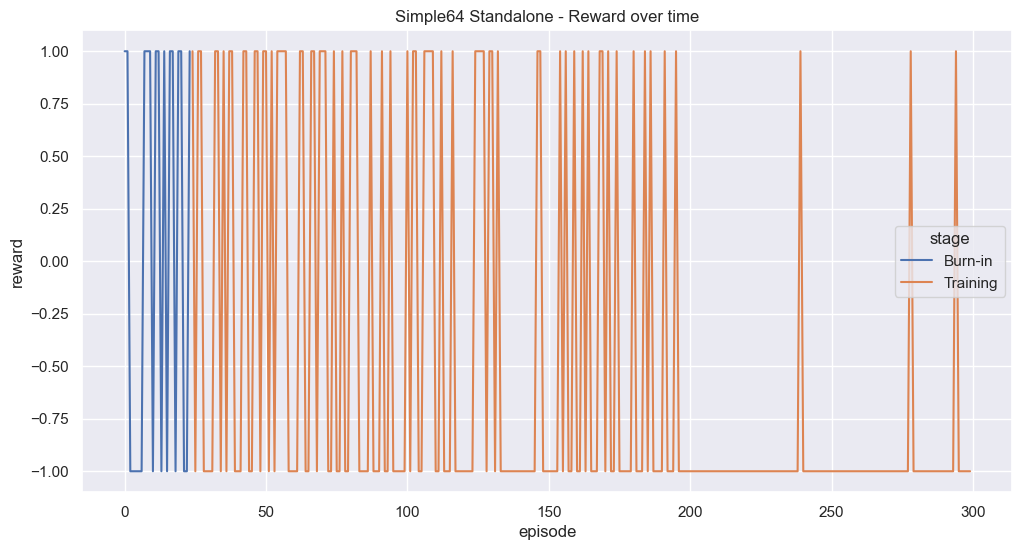

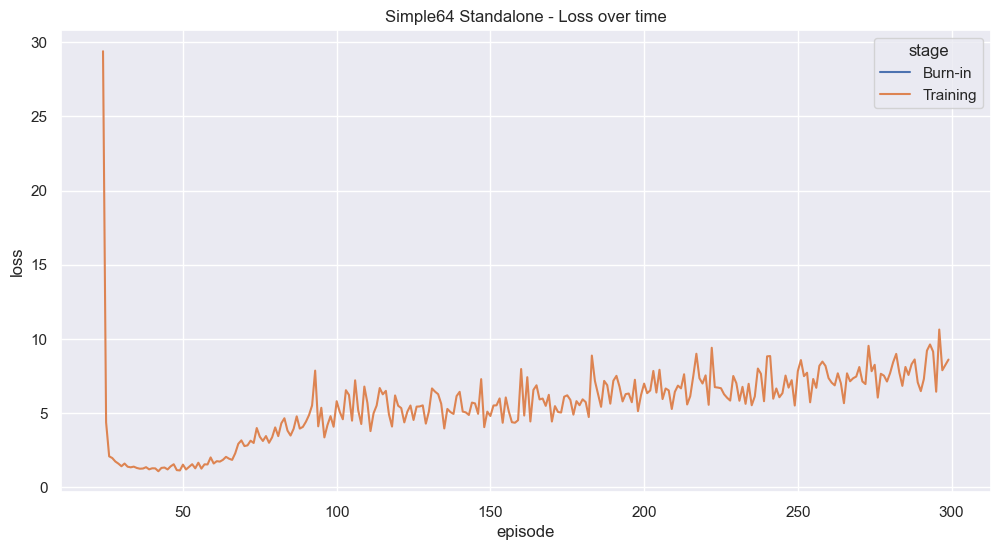

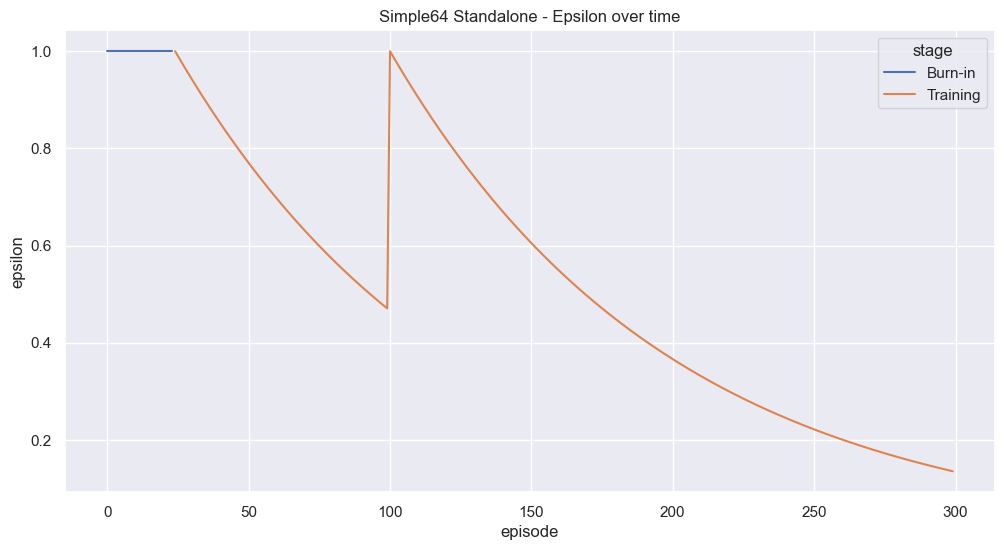

,map_name,reward,steps,epsilon,losses,emissions,score,is_training,is_exploit,is_random_mode,episode,stage,loss
0,Simple64,1.0,241,1.0,[],0.000915,0,False,False,False,0,Burn-in,NaN
1,Simple64,1.0,277,1.0,[],0.002814,0,False,False,False,1,Burn-in,NaN
2,Simple64,-1.0,451,1.0,[],0.007934,0,False,False,False,2,Burn-in,NaN
3,Simple64,-1.0,667,1.0,[],0.015654,0,False,False,False,3,Burn-in,NaN
4,Simple64,-1.0,456,1.0,[],0.014736,0,False,False,False,4,Burn-in,NaN


In [55]:
episode_stats, agent_stats, aggregated_stats = load_stats(simple64_model_id, model_name="Simple64 Standalone")
episode_stats.head()